## CMPINF2100 Weeek_09 | What Does LINEAR Actually Mean?

We use the phrase Linear Model or Linear Regression all the time, but what does it really mean?

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### What do you think linear means?

When most people hear **Linear Regression** they thing 'best fit line'. They think a staight line between the output and input.

But you now know that MODEL iss actually predicting AVERAGE OUTPUT!

So does LINEAR mean AVERAGE OUTPUT is LINEARLY RELATED to the INPUT?!

The math notation for the conventional LINEAR MODEL:

$$\mu = \beta_0 +\beta_1 \times x $$

But... what if we instead **PREPROCESSED** or TRANSFORMED thee input through a NON-LINEAR transformation function?

For example, let's define a NEW COLUMN `s` which is equal to the SIN(X) or the SINE FUNCTION applied to the input X.

The math notation looks like:

$$\mu = \beta_0 + \beta_1 \times s $$

The FEATURE depends on the INPUT! Or the FEATURE is a FUNCTION of the INPUT!

$$\mu = \beta_0 + \beta_1 \times \sin(x) $$

Formally, the DEFINITION of LINEAR has **NOTHING** to do with the RELATIONSHIP between the TREND (AVERAGE OUTPUT) and the INPUT!

Linear means the TREND is LINEARLY related to the UNKNOWN regression coefficients!

Let's use simulated data to demostrate all of the ASSUMPTIONS of the linear model as we did in the previous example.

### MAKE DATA

To make the data, we need to specify the coefficients and the sigma of the linear model.

We will pick these values but they can always be different.

In [14]:
b0_sin=0.25 ## aka the y-intercept
b1_sin=-2.25 ## aka the slope
sigma_sin=0.1

Generate input values from negative PI to positive PI.

In [15]:
df_sin = pd.DataFrame({'x': np.linspace(-3.14159, 3.14159, num=25)})

In [16]:
df_sin.head()

,x
0,-3.141590
1,-2.879791
2,-2.617992
3,-2.356192
4,-2.094393


The TREND or AVERAGE OUTPUT is a function of the INPUT!!!

In [17]:
df_sin['trend'] = b0_sin + b1_sin * np.sin( df_sin.x )

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


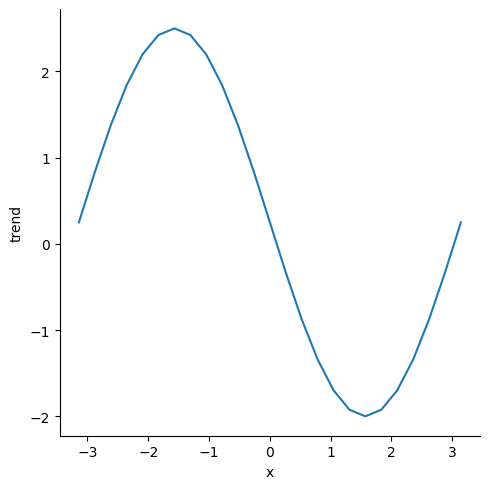

In [18]:
sns.relplot( data = df_sin, x = 'x', y = 'trend', kind = 'line' )

plt.show()

Observations of the OUTPUT are NORMALLY distributed **GIVEN** the TREND!

If we know the TREND we know EVERYTHING about the distribution ASSUMED by the linear model!

Use the random number generator to GENERATE the random outputs.

In [19]:
rg = np.random.default_rng(2100)

In [20]:
df_sin['y'] = rg.normal(loc = df_sin.trend.to_numpy(),
                        scale=sigma_sin,
                        size=df_sin.shape[0])

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


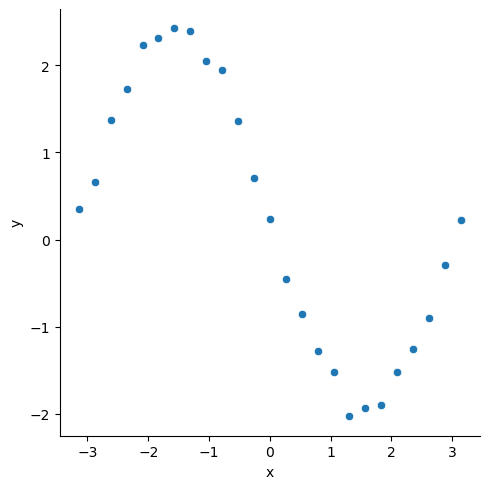

In [21]:
sns.relplot( data=df_sin, x='x', y='y')

plt.show()

The above data were generated from a LINEAR MODEL that satisfies **ALL** assumptions of the linear model!

To see that this is indeed a linear model, let's create the FEATURE `s` in the DataFrame

In [22]:
df_sin['s']=np.sin( df_sin.x )

Now visualize the relationship between the random OUTPUT and the FEATURE derived from the input!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


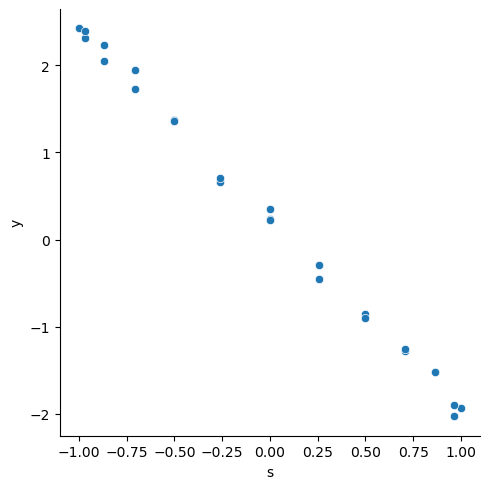

In [23]:
sns.relplot(data=df_sin, x='s', y='y')

plt.show()

### Simulation

Let's use the same simulation procedure as the previous example to reinforce the ASSUMPTIONS of the linear model!

We need a function that calculates the TREND for a given INPUT and INTERCEPT and SLOPE. Which then randomly generates OUTPUTS around the TREND for a given SIGMA value.

In [24]:
def generate_lm_sin(rid, xuse, b0, b1, sigma_use):
    res_df = pd.DataFrame({'x': xuse})
    res_df['trend'] = b0 + b1 * np.sin( res_df.x )

    res_df['y'] = rg.normal( loc=res_df.trend.to_numpy(),
                            scale = sigma_use,
                            size = res_df.shape[0])

    res_df['rep_id'] = rid

    return res_df
        

In [25]:
generate_lm_sin( 0, df_sin.x, b0_sin, b1_sin, sigma_sin ).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       25 non-null     float64
 1   trend   25 non-null     float64
 2   y       25 non-null     float64
 3   rep_id  25 non-null     int64  
dtypes: float64(3), int64(1)
memory usage: 928.0 bytes


Replicate the process *9* times.

In [26]:
study_9_list = []

for ix in range(9):
    study_9_list.append( generate_lm_sin( ix, df_sin.x,
                                         b0_sin, b1_sin,
                                         sigma_sin ))

In [27]:
study_9_df = pd.concat( study_9_list, ignore_index=True )

In [28]:
study_9_df

,x,trend,y,rep_id
0,-3.141590,0.250006,0.253441,0
1,-2.879791,0.832348,0.968594,0
2,-2.617992,1.375004,1.469100,0
3,-2.356192,1.840993,1.807124,0
4,-2.094393,2.198559,2.208667,0
...,...,...,...,...
220,2.094393,-1.698559,-1.645499,8
221,2.356192,-1.340993,-1.643355,8
222,2.617992,-0.875004,-0.972979,8
223,2.879791,-0.332348,-0.327948,8


Visualize the replications via facets!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


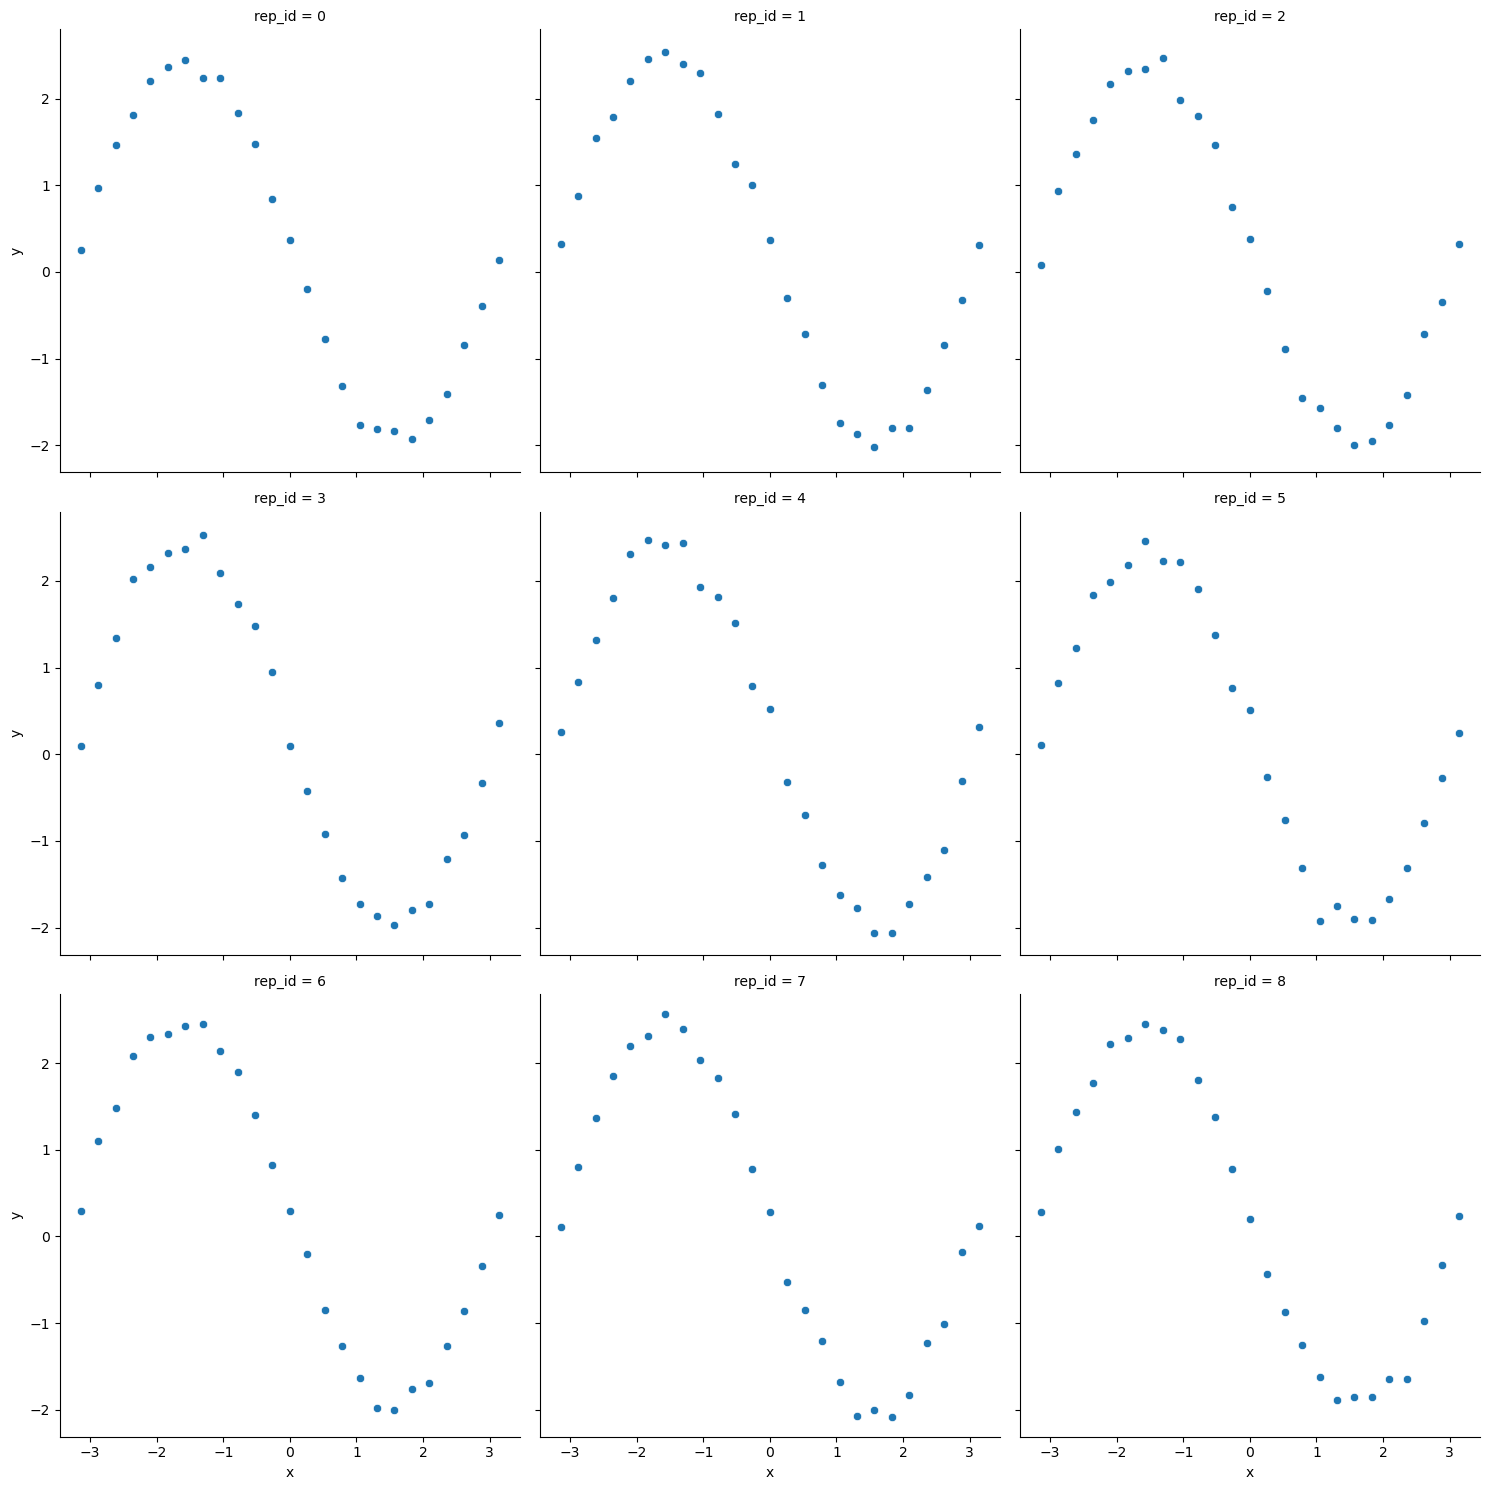

In [29]:
sns.relplot( data = study_9_df, x='x', y='y', kind='scatter', col='rep_id', col_wrap=3)

plt.show()

We can summarize by calculating the **AVERAGE** output at each INPUT location!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


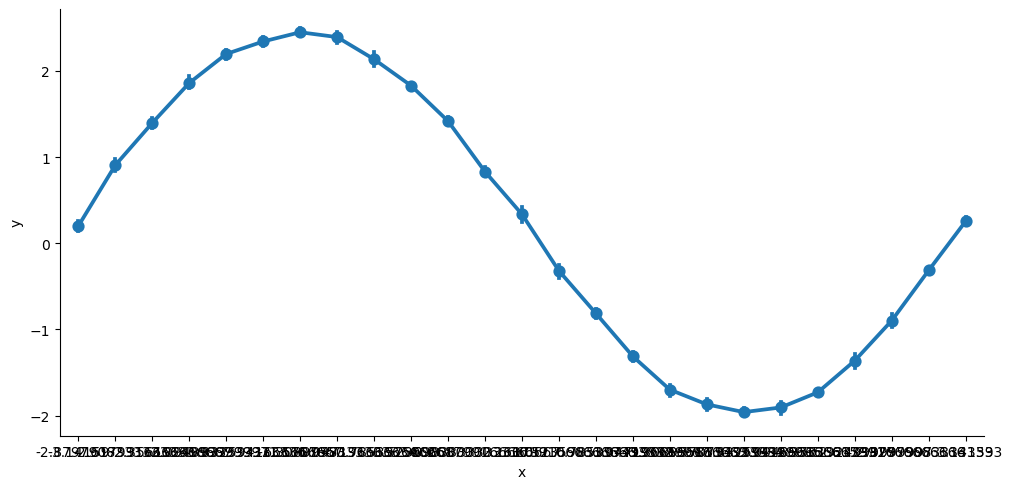

In [31]:
sns.catplot(data=study_9_df, x='x', y='y', kind='point', aspect=2)

plt.show()

Replicate the process 500 times!

In [33]:
study_500_list = []

for ix in range(500):
    study_500_list.append( generate_lm_sin(ix, df_sin.x,
                                           b0_sin, b1_sin,
                                           sigma_sin))

In [34]:
study_500_df = pd.concat( study_500_list, ignore_index=True)

Visualize the CONDITIONAL DISTRIBUTION of `y` GIVEN `x`.

C:\Users\Canye\AppData\Local\Temp\ipykernel_37552\2403642822.py:1: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=1`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.catplot( data=study_500_df, x='x', y='y', kind='violin', aspect=2, bw=1)
C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


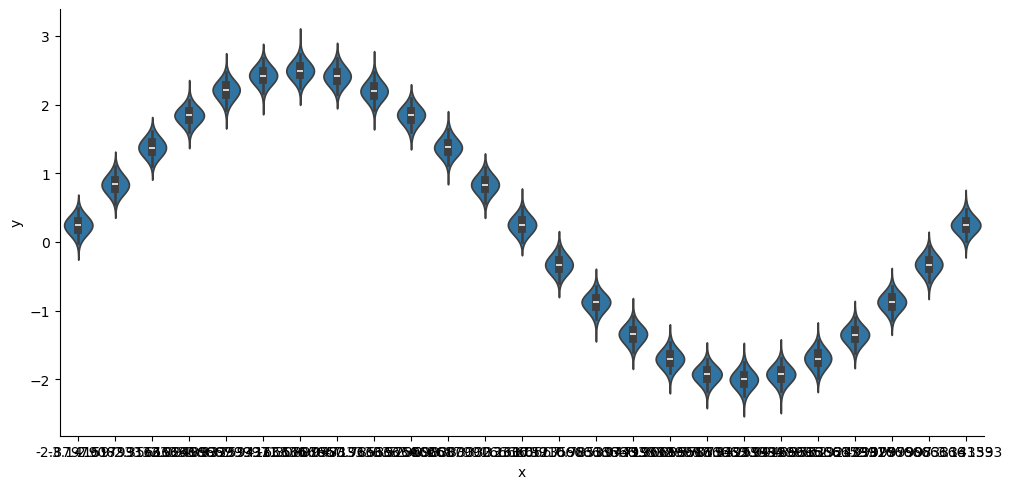

In [35]:
sns.catplot( data=study_500_df, x='x', y='y', kind='violin', aspect=2, bw=1)

plt.show()

### Why Does This Matter?

Far too often, people think that a linear model or LINEAR REGRESSION is only applied if they see a LINEAR TREND!

But that is **NOT** true!

You do not need to jump straight to NEURAL NETWORKS, DEEP LEARNERS, or GRADIENT BOOSTED TREES!

Very often, you just need to derive FEATURES from your INPUTS that are NON-LINEAR functions! You can then FIT linear models given those new FEATURES!